A helper function that converts images to RGB 

In [14]:
import os
import imghdr
from PIL import Image

def convert_images_rgb(path):
    """
    Converts images to RGB in the sub-directories of the given directory.
    
    Args:
        path: String value to the image directory(folder)
        
    Returns:
        None
    """
    # loop through the main directory (images folder)
    for dir_name in os.listdir(PATH):
        # Join subfolder and the main path
        dir_path = PATH + "\\" + dir_name
        # Loop through the subfolder  (test or train)
        for folder_name in os.listdir(dir_path):
            print(f"\nScanning folder: {dir_name}\{folder_name}\n")
            image_folder_path = dir_path + "\\" + folder_name
            images = os.listdir(image_folder_path)
            # Loop through the individual images
            for image in images:
                img_dir = image_folder_path + "\\"+ image
                im = Image.open(img_dir)
                rgb_im = im.convert("RGB")
                rgb_im.save(img_dir)
                print(f"File Name: {image} Type: {imghdr.what(img_dir)}")

## Converting the images

In [15]:
PATH = "images"
convert_images_rgb(PATH)


Scanning folder: test\Alto 2015

File Name: 01000.jpg Type: jpeg
File Name: 01004.jpg Type: jpeg
File Name: 01006.jpg Type: jpeg
File Name: 01012.jpg Type: jpeg
File Name: 01015.jpg Type: jpeg
File Name: 01020.jpg Type: jpeg
File Name: 01022.jpg Type: jpeg
File Name: 01038.jpg Type: jpeg
File Name: 01048.jpg Type: jpeg
File Name: 0105.jpg Type: jpeg
File Name: 01056.jpg Type: jpeg
File Name: 01057.jpg Type: jpeg
File Name: 01075.jpg Type: jpeg
File Name: 01080.jpg Type: jpeg
File Name: 01087.jpg Type: jpeg
File Name: 01089.jpg Type: jpeg
File Name: 01093.jpg Type: jpeg
File Name: 0110.jpg Type: jpeg
File Name: 01104.jpg Type: jpeg
File Name: 01113.jpg Type: jpeg
File Name: 01116.jpg Type: jpeg
File Name: 01122.jpg Type: jpeg
File Name: 01130.jpg Type: jpeg
File Name: 01136.jpg Type: jpeg
File Name: 01138.jpg Type: jpeg
File Name: 01141.jpg Type: jpeg
File Name: 01153.jpg Type: jpeg
File Name: 01158.jpg Type: jpeg
File Name: 01161.jpg Type: jpeg
File Name: 01164.jpg Type: jpeg
File Nam

File Name: 0978.jpg Type: jpeg
File Name: 0998.jpg Type: jpeg

Scanning folder: test\Hero Dash 2016

File Name: 0100.jpg Type: jpeg
File Name: 0102.jpg Type: jpeg
File Name: 0105.jpg Type: jpeg
File Name: 0108.jpg Type: jpeg
File Name: 0119.jpg Type: jpeg
File Name: 0122.jpg Type: jpeg
File Name: 0123.jpg Type: jpeg
File Name: 0131.jpg Type: jpeg
File Name: 014.jpg Type: jpeg
File Name: 015.jpg Type: jpeg
File Name: 0154.jpg Type: jpeg
File Name: 0157.jpg Type: jpeg
File Name: 0160.jpg Type: jpeg
File Name: 0193.jpg Type: jpeg
File Name: 0196.jpg Type: jpeg
File Name: 02.jpg Type: jpeg
File Name: 020.jpg Type: jpeg
File Name: 0204.jpg Type: jpeg
File Name: 022.jpg Type: jpeg
File Name: 0224.jpg Type: jpeg
File Name: 0225.jpg Type: jpeg
File Name: 0236.jpg Type: jpeg
File Name: 0256.jpg Type: jpeg
File Name: 0258.jpg Type: jpeg
File Name: 0275.jpg Type: jpeg
File Name: 0277.jpg Type: jpeg
File Name: 0289.jpg Type: jpeg
File Name: 0291.jpg Type: jpeg
File Name: 0294.jpg Type: jpeg
File N

File Name: 0895.jpg Type: jpeg
File Name: 0899.jpg Type: jpeg
File Name: 09.jpg Type: jpeg
File Name: 0901.jpg Type: jpeg
File Name: 0902.jpg Type: jpeg
File Name: 0909.jpg Type: jpeg
File Name: 0910.jpg Type: jpeg
File Name: 0915.jpg Type: jpeg
File Name: 0938.jpg Type: jpeg
File Name: 0941.jpg Type: jpeg
File Name: 0947.jpg Type: jpeg
File Name: 0951.jpg Type: jpeg
File Name: 0952.jpg Type: jpeg
File Name: 0960.jpg Type: jpeg
File Name: 097.jpg Type: jpeg
File Name: 0970.jpg Type: jpeg
File Name: 0972.jpg Type: jpeg
File Name: 0987.jpg Type: jpeg
File Name: 099.jpg Type: jpeg

Scanning folder: test\Wagon R Stingray 2018

File Name: 0010.jpg Type: jpeg
File Name: 00101.jpg Type: jpeg
File Name: 00103.jpg Type: jpeg
File Name: 00105.jpg Type: jpeg
File Name: 00106.jpg Type: jpeg
File Name: 00107.jpg Type: jpeg
File Name: 00109.jpg Type: jpeg
File Name: 00114.jpg Type: jpeg
File Name: 00119.jpg Type: jpeg
File Name: 00120.jpg Type: jpeg
File Name: 00124.jpg Type: jpeg
File Name: 00125.j

File Name: 01101.jpg Type: jpeg
File Name: 01102.jpg Type: jpeg
File Name: 01103.jpg Type: jpeg
File Name: 01105.jpg Type: jpeg
File Name: 01106.jpg Type: jpeg
File Name: 01107.jpg Type: jpeg
File Name: 01108.jpg Type: jpeg
File Name: 01109.jpg Type: jpeg
File Name: 0111.jpg Type: jpeg
File Name: 01110.jpg Type: jpeg
File Name: 01111.jpg Type: jpeg
File Name: 01112.jpg Type: jpeg
File Name: 01114.jpg Type: jpeg
File Name: 01115.jpg Type: jpeg
File Name: 01117.jpg Type: jpeg
File Name: 01118.jpg Type: jpeg
File Name: 01119.jpg Type: jpeg
File Name: 0112.jpg Type: jpeg
File Name: 01120.jpg Type: jpeg
File Name: 01123.jpg Type: jpeg
File Name: 01124.jpg Type: jpeg
File Name: 01125.jpg Type: jpeg
File Name: 01126.jpg Type: jpeg
File Name: 01127.jpg Type: jpeg
File Name: 01128.jpg Type: jpeg
File Name: 01129.jpg Type: jpeg
File Name: 0113.jpg Type: jpeg
File Name: 01131.jpg Type: jpeg
File Name: 01132.jpg Type: jpeg
File Name: 01133.jpg Type: jpeg
File Name: 01134.jpg Type: jpeg
File Name: 

File Name: 01402.jpg Type: jpeg
File Name: 01403.jpg Type: jpeg
File Name: 01404.jpg Type: jpeg
File Name: 01405.jpg Type: jpeg
File Name: 01407.jpg Type: jpeg
File Name: 01408.jpg Type: jpeg
File Name: 01409.jpg Type: jpeg
File Name: 0141.jpg Type: jpeg
File Name: 01411.jpg Type: jpeg
File Name: 01412.jpg Type: jpeg
File Name: 01414.jpg Type: jpeg
File Name: 01415.jpg Type: jpeg
File Name: 01417.jpg Type: jpeg
File Name: 0142.jpg Type: jpeg
File Name: 0143.jpg Type: jpeg
File Name: 0145.jpg Type: jpeg
File Name: 0147.jpg Type: jpeg
File Name: 0148.jpg Type: jpeg
File Name: 0149.jpg Type: jpeg
File Name: 015.jpg Type: jpeg
File Name: 0150.jpg Type: jpeg
File Name: 0151.jpg Type: jpeg
File Name: 0152.jpg Type: jpeg
File Name: 0153.jpg Type: jpeg
File Name: 0155.jpg Type: jpeg
File Name: 0156.jpg Type: jpeg
File Name: 0157.jpg Type: jpeg
File Name: 0158.jpg Type: jpeg
File Name: 0159.jpg Type: jpeg
File Name: 016.jpg Type: jpeg
File Name: 0160.jpg Type: jpeg
File Name: 0161.jpg Type: jpe

File Name: 0432.jpg Type: jpeg
File Name: 0433.jpg Type: jpeg
File Name: 0434.jpg Type: jpeg
File Name: 0435.jpg Type: jpeg
File Name: 0436.jpg Type: jpeg
File Name: 0437.jpg Type: jpeg
File Name: 0438.jpg Type: jpeg
File Name: 044.jpg Type: jpeg
File Name: 0440.jpg Type: jpeg
File Name: 0442.jpg Type: jpeg
File Name: 0443.jpg Type: jpeg
File Name: 0444.jpg Type: jpeg
File Name: 0445.jpg Type: jpeg
File Name: 0447.jpg Type: jpeg
File Name: 0448.jpg Type: jpeg
File Name: 045.jpg Type: jpeg
File Name: 0450.jpg Type: jpeg
File Name: 0451.jpg Type: jpeg
File Name: 0452.jpg Type: jpeg
File Name: 0453.jpg Type: jpeg
File Name: 0455.jpg Type: jpeg
File Name: 0456.jpg Type: jpeg
File Name: 0458.jpg Type: jpeg
File Name: 046.jpg Type: jpeg
File Name: 0460.jpg Type: jpeg
File Name: 0462.jpg Type: jpeg
File Name: 0463.jpg Type: jpeg
File Name: 0464.jpg Type: jpeg
File Name: 0465.jpg Type: jpeg
File Name: 0466.jpg Type: jpeg
File Name: 0467.jpg Type: jpeg
File Name: 0468.jpg Type: jpeg
File Name: 

File Name: 0765.jpg Type: jpeg
File Name: 0767.jpg Type: jpeg
File Name: 0768.jpg Type: jpeg
File Name: 077.jpg Type: jpeg
File Name: 0772.jpg Type: jpeg
File Name: 0773.jpg Type: jpeg
File Name: 0774.jpg Type: jpeg
File Name: 0775.jpg Type: jpeg
File Name: 0776.jpg Type: jpeg
File Name: 0777.jpg Type: jpeg
File Name: 0778.jpg Type: jpeg
File Name: 078.jpg Type: jpeg
File Name: 0780.jpg Type: jpeg
File Name: 0781.jpg Type: jpeg
File Name: 0782.jpg Type: jpeg
File Name: 0783.jpg Type: jpeg
File Name: 0784.jpg Type: jpeg
File Name: 0785.jpg Type: jpeg
File Name: 0787.jpg Type: jpeg
File Name: 0788.jpg Type: jpeg
File Name: 079.jpg Type: jpeg
File Name: 0790.jpg Type: jpeg
File Name: 0792.jpg Type: jpeg
File Name: 0793.jpg Type: jpeg
File Name: 0794.jpg Type: jpeg
File Name: 0795.jpg Type: jpeg
File Name: 0796.jpg Type: jpeg
File Name: 0797.jpg Type: jpeg
File Name: 0798.jpg Type: jpeg
File Name: 0799.jpg Type: jpeg
File Name: 08.jpg Type: jpeg
File Name: 0800.jpg Type: jpeg
File Name: 08

File Name: 0200.jpg Type: jpeg
File Name: 0202.jpg Type: jpeg
File Name: 0203.jpg Type: jpeg
File Name: 0206.jpg Type: jpeg
File Name: 0207.jpg Type: jpeg
File Name: 0211.jpg Type: jpeg
File Name: 0212.jpg Type: jpeg
File Name: 0213.jpg Type: jpeg
File Name: 0214.jpg Type: jpeg
File Name: 0216.jpg Type: jpeg
File Name: 0220.jpg Type: jpeg
File Name: 0221.jpg Type: jpeg
File Name: 0222.jpg Type: jpeg
File Name: 0223.jpg Type: jpeg
File Name: 0226.jpg Type: jpeg
File Name: 0228.jpg Type: jpeg
File Name: 0229.jpg Type: jpeg
File Name: 0230.jpg Type: jpeg
File Name: 0232.jpg Type: jpeg
File Name: 0233.jpg Type: jpeg
File Name: 0234.jpg Type: jpeg
File Name: 0235.jpg Type: jpeg
File Name: 0237.jpg Type: jpeg
File Name: 0240.jpg Type: jpeg
File Name: 0242.jpg Type: jpeg
File Name: 0243.jpg Type: jpeg
File Name: 0244.jpg Type: jpeg
File Name: 0245.jpg Type: jpeg
File Name: 0247.jpg Type: jpeg
File Name: 025.jpg Type: jpeg
File Name: 0250.jpg Type: jpeg
File Name: 0251.jpg Type: jpeg
File Name

File Name: 0673.jpg Type: jpeg
File Name: 0675.jpg Type: jpeg
File Name: 0676.jpg Type: jpeg
File Name: 0682.jpg Type: jpeg
File Name: 0691.jpg Type: jpeg
File Name: 0692.jpg Type: jpeg
File Name: 0693.jpg Type: jpeg
File Name: 0694.jpg Type: jpeg
File Name: 0697.jpg Type: jpeg
File Name: 0699.jpg Type: jpeg
File Name: 07.jpg Type: jpeg
File Name: 070.jpg Type: jpeg
File Name: 0700.jpg Type: jpeg
File Name: 0703.jpg Type: jpeg
File Name: 0706.jpg Type: jpeg
File Name: 071.jpg Type: jpeg
File Name: 0710.jpg Type: jpeg
File Name: 0711.jpg Type: jpeg
File Name: 0716.jpg Type: jpeg
File Name: 0717.jpg Type: jpeg
File Name: 072.jpg Type: jpeg
File Name: 0720.jpg Type: jpeg
File Name: 0721.jpg Type: jpeg
File Name: 0723.jpg Type: jpeg
File Name: 0724.jpg Type: jpeg
File Name: 0725.jpg Type: jpeg
File Name: 0726.jpg Type: jpeg
File Name: 0728.jpg Type: jpeg
File Name: 0729.jpg Type: jpeg
File Name: 0730.jpg Type: jpeg
File Name: 0731.jpg Type: jpeg
File Name: 0732.jpg Type: jpeg
File Name: 07

File Name: 0133.jpg Type: jpeg
File Name: 01332.jpg Type: jpeg
File Name: 01335.jpg Type: jpeg
File Name: 01336.jpg Type: jpeg
File Name: 01337.jpg Type: jpeg
File Name: 01338.jpg Type: jpeg
File Name: 01339.jpg Type: jpeg
File Name: 0134.jpg Type: jpeg
File Name: 01342.jpg Type: jpeg
File Name: 01343.jpg Type: jpeg
File Name: 01344.jpg Type: jpeg
File Name: 01346.jpg Type: jpeg
File Name: 01347.jpg Type: jpeg
File Name: 01349.jpg Type: jpeg
File Name: 01350.jpg Type: jpeg
File Name: 01352.jpg Type: jpeg
File Name: 01356.jpg Type: jpeg
File Name: 01357.jpg Type: jpeg
File Name: 01360.jpg Type: jpeg
File Name: 01361.jpg Type: jpeg
File Name: 01362.jpg Type: jpeg
File Name: 01363.jpg Type: jpeg
File Name: 01364.jpg Type: jpeg
File Name: 01365.jpg Type: jpeg
File Name: 01366.jpg Type: jpeg
File Name: 01367.jpg Type: jpeg
File Name: 01368.jpg Type: jpeg
File Name: 01369.jpg Type: jpeg
File Name: 0137.jpg Type: jpeg
File Name: 01370.jpg Type: jpeg
File Name: 01371.jpg Type: jpeg
File Name: 

File Name: 054.jpg Type: jpeg
File Name: 0540.jpg Type: jpeg
File Name: 0545.jpg Type: jpeg
File Name: 0546.jpg Type: jpeg
File Name: 0547.jpg Type: jpeg
File Name: 0548.jpg Type: jpeg
File Name: 0550.jpg Type: jpeg
File Name: 0551.jpg Type: jpeg
File Name: 0552.jpg Type: jpeg
File Name: 0553.jpg Type: jpeg
File Name: 0555.jpg Type: jpeg
File Name: 0556.jpg Type: jpeg
File Name: 0557.jpg Type: jpeg
File Name: 0559.jpg Type: jpeg
File Name: 056.jpg Type: jpeg
File Name: 0564.jpg Type: jpeg
File Name: 0567.jpg Type: jpeg
File Name: 0568.jpg Type: jpeg
File Name: 057.jpg Type: jpeg
File Name: 0573.jpg Type: jpeg
File Name: 0575.jpg Type: jpeg
File Name: 0576.jpg Type: jpeg
File Name: 0577.jpg Type: jpeg
File Name: 0580.jpg Type: jpeg
File Name: 0584.jpg Type: jpeg
File Name: 0587.jpg Type: jpeg
File Name: 0589.jpg Type: jpeg
File Name: 0591.jpg Type: jpeg
File Name: 0593.jpg Type: jpeg
File Name: 0594.jpg Type: jpeg
File Name: 0595.jpg Type: jpeg
File Name: 0596.jpg Type: jpeg
File Name: 

File Name: 0990.jpg Type: jpeg
File Name: 0991.jpg Type: jpeg
File Name: 0992.jpg Type: jpeg
File Name: 0993.jpg Type: jpeg
File Name: 0995.jpg Type: jpeg
File Name: 0997.jpg Type: jpeg

Scanning folder: train\Wagon R Stingray 2018

File Name: 001.jpg Type: jpeg
File Name: 00100.jpg Type: jpeg
File Name: 00102.jpg Type: jpeg
File Name: 00104.jpg Type: jpeg
File Name: 00108.jpg Type: jpeg
File Name: 0011.jpg Type: jpeg
File Name: 00110.jpg Type: jpeg
File Name: 00111.jpg Type: jpeg
File Name: 00112.jpg Type: jpeg
File Name: 00113.jpg Type: jpeg
File Name: 00115.jpg Type: jpeg
File Name: 00116.jpg Type: jpeg
File Name: 00117.jpg Type: jpeg
File Name: 00118.jpg Type: jpeg
File Name: 0012.jpg Type: jpeg
File Name: 00121.jpg Type: jpeg
File Name: 00122.jpg Type: jpeg
File Name: 00123.jpg Type: jpeg
File Name: 00126.jpg Type: jpeg
File Name: 00127.jpg Type: jpeg
File Name: 00132.jpg Type: jpeg
File Name: 00134.jpg Type: jpeg
File Name: 00135.jpg Type: jpeg
File Name: 00137.jpg Type: jpeg
Fil

File Name: 00403.jpg Type: jpeg
File Name: 00404.jpg Type: jpeg
File Name: 00405.jpg Type: jpeg
File Name: 00406.jpg Type: jpeg
File Name: 00407.jpg Type: jpeg
File Name: 00408.jpg Type: jpeg
File Name: 00409.jpg Type: jpeg
File Name: 00410.jpg Type: jpeg
File Name: 00411.jpg Type: jpeg
File Name: 00413.jpg Type: jpeg
File Name: 00414.jpg Type: jpeg
File Name: 00415.jpg Type: jpeg
File Name: 00417.jpg Type: jpeg
File Name: 00419.jpg Type: jpeg
File Name: 0042.jpg Type: jpeg
File Name: 00420.jpg Type: jpeg
File Name: 00421.jpg Type: jpeg
File Name: 00422.jpg Type: jpeg
File Name: 00423.jpg Type: jpeg
File Name: 00425.jpg Type: jpeg
File Name: 00427.jpg Type: jpeg
File Name: 00429.jpg Type: jpeg
File Name: 0043.jpg Type: jpeg
File Name: 00430.jpg Type: jpeg
File Name: 00431.jpg Type: jpeg
File Name: 00432.jpg Type: jpeg
File Name: 00433.jpg Type: jpeg
File Name: 00434.jpg Type: jpeg
File Name: 00435.jpg Type: jpeg
File Name: 00436.jpg Type: jpeg
File Name: 00437.jpg Type: jpeg
File Name:

File Name: 00698.jpg Type: jpeg
File Name: 00699.jpg Type: jpeg
File Name: 007.jpg Type: jpeg
File Name: 0070.jpg Type: jpeg
File Name: 00700.jpg Type: jpeg
File Name: 00702.jpg Type: jpeg
File Name: 00704.jpg Type: jpeg
File Name: 00705.jpg Type: jpeg
File Name: 00706.jpg Type: jpeg
File Name: 00707.jpg Type: jpeg
File Name: 00708.jpg Type: jpeg
File Name: 00710.jpg Type: jpeg
File Name: 00712.jpg Type: jpeg
File Name: 00713.jpg Type: jpeg
File Name: 00714.jpg Type: jpeg
File Name: 00715.jpg Type: jpeg
File Name: 00717.jpg Type: jpeg
File Name: 00718.jpg Type: jpeg
File Name: 00719.jpg Type: jpeg
File Name: 0072.jpg Type: jpeg
File Name: 00720.jpg Type: jpeg
File Name: 00721.jpg Type: jpeg
File Name: 00722.jpg Type: jpeg
File Name: 00724.jpg Type: jpeg
File Name: 00725.jpg Type: jpeg
File Name: 00727.jpg Type: jpeg
File Name: 00728.jpg Type: jpeg
File Name: 00729.jpg Type: jpeg
File Name: 0073.jpg Type: jpeg
File Name: 00730.jpg Type: jpeg
File Name: 00731.jpg Type: jpeg
File Name: 00

In [27]:
PATH = "D:\Projects\Python\Projects\Price Finder\classification_model\images"

# loops through the sub-directories and call the convert_images_rgb() function
for dir_name in os.listdir(PATH):
    dir_path = PATH + "\\" + dir_name
    for folder_name in os.listdir(dir_path):
        print(f"\nScanning folder: {dir_name}\{folder_name}\n")
        image_folder_path = dir_path + "\\" + folder_name
        convert_images_rgb(image_folder_path)


Scanning folder: test\Alto 2015

File Name: 01000.jpg Type: jpeg
File Name: 01004.jpg Type: jpeg
File Name: 01006.jpg Type: jpeg
File Name: 01012.jpg Type: jpeg
File Name: 01015.jpg Type: jpeg
File Name: 01020.jpg Type: jpeg
File Name: 01022.jpg Type: jpeg
File Name: 01038.jpg Type: jpeg
File Name: 01048.jpg Type: jpeg
File Name: 0105.jpg Type: jpeg
File Name: 01056.jpg Type: jpeg
File Name: 01057.jpg Type: jpeg
File Name: 01075.jpg Type: jpeg
File Name: 01080.jpg Type: jpeg
File Name: 01087.jpg Type: jpeg
File Name: 01089.jpg Type: jpeg
File Name: 01093.jpg Type: jpeg
File Name: 0110.jpg Type: jpeg
File Name: 01104.jpg Type: jpeg
File Name: 01113.jpg Type: jpeg
File Name: 01116.jpg Type: jpeg
File Name: 01122.jpg Type: jpeg
File Name: 01130.jpg Type: jpeg
File Name: 01136.jpg Type: jpeg
File Name: 01138.jpg Type: jpeg
File Name: 01141.jpg Type: jpeg
File Name: 01153.jpg Type: jpeg
File Name: 01158.jpg Type: jpeg
File Name: 01161.jpg Type: jpeg
File Name: 01164.jpg Type: jpeg
File Nam

File Name: 0924.jpg Type: jpeg
File Name: 0929.jpg Type: jpeg
File Name: 0945.jpg Type: jpeg
File Name: 0946.jpg Type: jpeg
File Name: 0948.jpg Type: jpeg
File Name: 0951.jpg Type: jpeg
File Name: 0960.jpg Type: jpeg
File Name: 0961.jpg Type: jpeg
File Name: 0963.jpg Type: jpeg
File Name: 0964.jpg Type: jpeg
File Name: 0970.jpg Type: jpeg
File Name: 0972.jpg Type: jpeg
File Name: 0974.jpg Type: jpeg
File Name: 0976.jpg Type: jpeg
File Name: 0978.jpg Type: jpeg
File Name: 0998.jpg Type: jpeg

Scanning folder: test\Hero Dash 2016

File Name: 0100.jpg Type: jpeg
File Name: 0102.jpg Type: jpeg
File Name: 0105.jpg Type: jpeg
File Name: 0108.jpg Type: jpeg
File Name: 0119.jpg Type: jpeg
File Name: 0122.jpg Type: jpeg
File Name: 0123.jpg Type: jpeg
File Name: 0131.jpg Type: jpeg
File Name: 014.jpg Type: jpeg
File Name: 015.jpg Type: jpeg
File Name: 0154.jpg Type: jpeg
File Name: 0157.jpg Type: jpeg
File Name: 0160.jpg Type: jpeg
File Name: 0193.jpg Type: jpeg
File Name: 0196.jpg Type: jpeg
Fi

File Name: 0863.jpg Type: jpeg
File Name: 0869.jpg Type: jpeg
File Name: 0874.jpg Type: jpeg
File Name: 0878.jpg Type: jpeg
File Name: 088.jpg Type: jpeg
File Name: 0894.jpg Type: jpeg
File Name: 0895.jpg Type: jpeg
File Name: 0899.jpg Type: jpeg
File Name: 09.jpg Type: jpeg
File Name: 0901.jpg Type: jpeg
File Name: 0902.jpg Type: jpeg
File Name: 0909.jpg Type: jpeg
File Name: 0910.jpg Type: jpeg
File Name: 0915.jpg Type: jpeg
File Name: 0938.jpg Type: jpeg
File Name: 0941.jpg Type: jpeg
File Name: 0947.jpg Type: jpeg
File Name: 0951.jpg Type: jpeg
File Name: 0952.jpg Type: jpeg
File Name: 0960.jpg Type: jpeg
File Name: 097.jpg Type: jpeg
File Name: 0970.jpg Type: jpeg
File Name: 0972.jpg Type: jpeg
File Name: 0987.jpg Type: jpeg
File Name: 099.jpg Type: jpeg

Scanning folder: train\Alto 2015

File Name: 01.jpg Type: jpeg
File Name: 010.jpg Type: jpeg
File Name: 0100.jpg Type: jpeg
File Name: 01001.jpg Type: jpeg
File Name: 01002.jpg Type: jpeg
File Name: 01003.jpg Type: jpeg
File Name

File Name: 01273.jpg Type: jpeg
File Name: 01274.jpg Type: jpeg
File Name: 01275.jpg Type: jpeg
File Name: 01276.jpg Type: jpeg
File Name: 01277.jpg Type: jpeg
File Name: 01278.jpg Type: jpeg
File Name: 01281.jpg Type: jpeg
File Name: 01282.jpg Type: jpeg
File Name: 01284.jpg Type: jpeg
File Name: 01285.jpg Type: jpeg
File Name: 01286.jpg Type: jpeg
File Name: 01287.jpg Type: jpeg
File Name: 01291.jpg Type: jpeg
File Name: 01293.jpg Type: jpeg
File Name: 01294.jpg Type: jpeg
File Name: 01295.jpg Type: jpeg
File Name: 01298.jpg Type: jpeg
File Name: 013.jpg Type: jpeg
File Name: 0130.jpg Type: jpeg
File Name: 01300.jpg Type: jpeg
File Name: 01301.jpg Type: jpeg
File Name: 01302.jpg Type: jpeg
File Name: 01303.jpg Type: jpeg
File Name: 01304.jpg Type: jpeg
File Name: 01305.jpg Type: jpeg
File Name: 01307.jpg Type: jpeg
File Name: 01308.jpg Type: jpeg
File Name: 01309.jpg Type: jpeg
File Name: 0131.jpg Type: jpeg
File Name: 01310.jpg Type: jpeg
File Name: 01311.jpg Type: jpeg
File Name: 0

File Name: 0313.jpg Type: jpeg
File Name: 0315.jpg Type: jpeg
File Name: 0318.jpg Type: jpeg
File Name: 0319.jpg Type: jpeg
File Name: 032.jpg Type: jpeg
File Name: 0321.jpg Type: jpeg
File Name: 0322.jpg Type: jpeg
File Name: 0325.jpg Type: jpeg
File Name: 0326.jpg Type: jpeg
File Name: 0329.jpg Type: jpeg
File Name: 033.jpg Type: jpeg
File Name: 0330.jpg Type: jpeg
File Name: 0332.jpg Type: jpeg
File Name: 0333.jpg Type: jpeg
File Name: 0334.jpg Type: jpeg
File Name: 0335.jpg Type: jpeg
File Name: 0336.jpg Type: jpeg
File Name: 0337.jpg Type: jpeg
File Name: 0338.jpg Type: jpeg
File Name: 034.jpg Type: jpeg
File Name: 0340.jpg Type: jpeg
File Name: 0341.jpg Type: jpeg
File Name: 0342.jpg Type: jpeg
File Name: 0343.jpg Type: jpeg
File Name: 0344.jpg Type: jpeg
File Name: 0345.jpg Type: jpeg
File Name: 0346.jpg Type: jpeg
File Name: 0347.jpg Type: jpeg
File Name: 0349.jpg Type: jpeg
File Name: 0351.jpg Type: jpeg
File Name: 0353.jpg Type: jpeg
File Name: 0354.jpg Type: jpeg
File Name: 

File Name: 0640.jpg Type: jpeg
File Name: 0644.jpg Type: jpeg
File Name: 0645.jpg Type: jpeg
File Name: 0646.jpg Type: jpeg
File Name: 0647.jpg Type: jpeg
File Name: 0648.jpg Type: jpeg
File Name: 0649.jpg Type: jpeg
File Name: 065.jpg Type: jpeg
File Name: 0650.jpg Type: jpeg
File Name: 0654.jpg Type: jpeg
File Name: 0655.jpg Type: jpeg
File Name: 0656.jpg Type: jpeg
File Name: 0657.jpg Type: jpeg
File Name: 0658.jpg Type: jpeg
File Name: 0659.jpg Type: jpeg
File Name: 0660.jpg Type: jpeg
File Name: 0661.jpg Type: jpeg
File Name: 0662.jpg Type: jpeg
File Name: 0663.jpg Type: jpeg
File Name: 0664.jpg Type: jpeg
File Name: 0665.jpg Type: jpeg
File Name: 0667.jpg Type: jpeg
File Name: 0668.jpg Type: jpeg
File Name: 0669.jpg Type: jpeg
File Name: 067.jpg Type: jpeg
File Name: 0670.jpg Type: jpeg
File Name: 0671.jpg Type: jpeg
File Name: 0672.jpg Type: jpeg
File Name: 0673.jpg Type: jpeg
File Name: 0674.jpg Type: jpeg
File Name: 0676.jpg Type: jpeg
File Name: 0677.jpg Type: jpeg
File Name:

File Name: 0953.jpg Type: jpeg
File Name: 0954.jpg Type: jpeg
File Name: 0955.jpg Type: jpeg
File Name: 0956.jpg Type: jpeg
File Name: 0957.jpg Type: jpeg
File Name: 0958.jpg Type: jpeg
File Name: 0959.jpg Type: jpeg
File Name: 096.jpg Type: jpeg
File Name: 0962.jpg Type: jpeg
File Name: 0965.jpg Type: jpeg
File Name: 0966.jpg Type: jpeg
File Name: 0967.jpg Type: jpeg
File Name: 0968.jpg Type: jpeg
File Name: 0969.jpg Type: jpeg
File Name: 097.jpg Type: jpeg
File Name: 0971.jpg Type: jpeg
File Name: 0973.jpg Type: jpeg
File Name: 0975.jpg Type: jpeg
File Name: 0977.jpg Type: jpeg
File Name: 0979.jpg Type: jpeg
File Name: 098.jpg Type: jpeg
File Name: 0980.jpg Type: jpeg
File Name: 0981.jpg Type: jpeg
File Name: 0982.jpg Type: jpeg
File Name: 0983.jpg Type: jpeg
File Name: 0984.jpg Type: jpeg
File Name: 0985.jpg Type: jpeg
File Name: 0986.jpg Type: jpeg
File Name: 0987.jpg Type: jpeg
File Name: 0988.jpg Type: jpeg
File Name: 0989.jpg Type: jpeg
File Name: 099.jpg Type: jpeg
File Name: 0

File Name: 0477.jpg Type: jpeg
File Name: 0480.jpg Type: jpeg
File Name: 0485.jpg Type: jpeg
File Name: 0488.jpg Type: jpeg
File Name: 0490.jpg Type: jpeg
File Name: 0493.jpg Type: jpeg
File Name: 0495.jpg Type: jpeg
File Name: 0497.jpg Type: jpeg
File Name: 0498.jpg Type: jpeg
File Name: 0503.jpg Type: jpeg
File Name: 0504.jpg Type: jpeg
File Name: 0506.jpg Type: jpeg
File Name: 0507.jpg Type: jpeg
File Name: 0509.jpg Type: jpeg
File Name: 0511.jpg Type: jpeg
File Name: 0516.jpg Type: jpeg
File Name: 0517.jpg Type: jpeg
File Name: 0518.jpg Type: jpeg
File Name: 0519.jpg Type: jpeg
File Name: 0521.jpg Type: jpeg
File Name: 0522.jpg Type: jpeg
File Name: 0523.jpg Type: jpeg
File Name: 0524.jpg Type: jpeg
File Name: 0525.jpg Type: jpeg
File Name: 0529.jpg Type: jpeg
File Name: 0530.jpg Type: jpeg
File Name: 0535.jpg Type: jpeg
File Name: 0537.jpg Type: jpeg
File Name: 0539.jpg Type: jpeg
File Name: 0541.jpg Type: jpeg
File Name: 0545.jpg Type: jpeg
File Name: 0546.jpg Type: jpeg
File Nam

File Name: 01175.jpg Type: jpeg
File Name: 01177.jpg Type: jpeg
File Name: 01178.jpg Type: jpeg
File Name: 01181.jpg Type: jpeg
File Name: 01182.jpg Type: jpeg
File Name: 01183.jpg Type: jpeg
File Name: 01185.jpg Type: jpeg
File Name: 01186.jpg Type: jpeg
File Name: 01187.jpg Type: jpeg
File Name: 01188.jpg Type: jpeg
File Name: 01189.jpg Type: jpeg
File Name: 01190.jpg Type: jpeg
File Name: 01192.jpg Type: jpeg
File Name: 01194.jpg Type: jpeg
File Name: 01195.jpg Type: jpeg
File Name: 01196.jpg Type: jpeg
File Name: 01197.jpg Type: jpeg
File Name: 01198.jpg Type: jpeg
File Name: 01199.jpg Type: jpeg
File Name: 01200.jpg Type: jpeg
File Name: 01202.jpg Type: jpeg
File Name: 01203.jpg Type: jpeg
File Name: 01205.jpg Type: jpeg
File Name: 01211.jpg Type: jpeg
File Name: 01212.jpg Type: jpeg
File Name: 01213.jpg Type: jpeg
File Name: 01215.jpg Type: jpeg
File Name: 01218.jpg Type: jpeg
File Name: 01220.jpg Type: jpeg
File Name: 01221.jpg Type: jpeg
File Name: 01226.jpg Type: jpeg
File Nam

File Name: 0361.jpg Type: jpeg
File Name: 0362.jpg Type: jpeg
File Name: 0364.jpg Type: jpeg
File Name: 0367.jpg Type: jpeg
File Name: 0368.jpg Type: jpeg
File Name: 037.jpg Type: jpeg
File Name: 0371.jpg Type: jpeg
File Name: 0373.jpg Type: jpeg
File Name: 0376.jpg Type: jpeg
File Name: 0378.jpg Type: jpeg
File Name: 038.jpg Type: jpeg
File Name: 0380.jpg Type: jpeg
File Name: 0386.jpg Type: jpeg
File Name: 0387.jpg Type: jpeg
File Name: 0391.jpg Type: jpeg
File Name: 0393.jpg Type: jpeg
File Name: 0394.jpg Type: jpeg
File Name: 0396.jpg Type: jpeg
File Name: 0397.jpg Type: jpeg
File Name: 0399.jpg Type: jpeg
File Name: 04.jpg Type: jpeg
File Name: 0400.jpg Type: jpeg
File Name: 0401.jpg Type: jpeg
File Name: 0404.jpg Type: jpeg
File Name: 0405.jpg Type: jpeg
File Name: 0406.jpg Type: jpeg
File Name: 0409.jpg Type: jpeg
File Name: 0412.jpg Type: jpeg
File Name: 0414.jpg Type: jpeg
File Name: 0416.jpg Type: jpeg
File Name: 0417.jpg Type: jpeg
File Name: 0418.jpg Type: jpeg
File Name: 0

File Name: 0827.jpg Type: jpeg
File Name: 083.jpg Type: jpeg
File Name: 0830.jpg Type: jpeg
File Name: 0831.jpg Type: jpeg
File Name: 0832.jpg Type: jpeg
File Name: 0835.jpg Type: jpeg
File Name: 0836.jpg Type: jpeg
File Name: 0837.jpg Type: jpeg
File Name: 0838.jpg Type: jpeg
File Name: 0839.jpg Type: jpeg
File Name: 084.jpg Type: jpeg
File Name: 0840.jpg Type: jpeg
File Name: 0841.jpg Type: jpeg
File Name: 0848.jpg Type: jpeg
File Name: 085.jpg Type: jpeg
File Name: 0851.jpg Type: jpeg
File Name: 0852.jpg Type: jpeg
File Name: 0853.jpg Type: jpeg
File Name: 0854.jpg Type: jpeg
File Name: 0856.jpg Type: jpeg
File Name: 0857.jpg Type: jpeg
File Name: 0858.jpg Type: jpeg
File Name: 0859.jpg Type: jpeg
File Name: 0860.jpg Type: jpeg
File Name: 0861.jpg Type: jpeg
File Name: 0864.jpg Type: jpeg
File Name: 0866.jpg Type: jpeg
File Name: 0868.jpg Type: jpeg
File Name: 087.jpg Type: jpeg
File Name: 0870.jpg Type: jpeg
File Name: 0872.jpg Type: jpeg
File Name: 0875.jpg Type: jpeg
File Name: 0

In [6]:
# Creating training set and test directory paths

train_dir = "images/train"
test_dir = "images/test"

## Creating the data batches

In [7]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE,
                                                                shuffle=False)

Found 2933 files belonging to 4 classes.
Found 727 files belonging to 4 classes.


In [18]:
# Checking out the class names
train_data.class_names

['Alto 2015', 'Hero Dash 2016', 'Toyota Aqua 2014', 'Wagon R Stingray 2018']

In [4]:
# Helper function to create tensorboard callbacks
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    #os.makedirs(dir_name, exist_ok=True)
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

## Model 1: Building a transfer learning feature extraction model using the Keras Functional API

In [8]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

# 2. Freeze the base model (the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs (you don't have to for EfficientNet(s))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Avergae pool the outputs of the base model (aggregate all the most important information, reduce the number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation = "softmax", name = "output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 10. Fit the model and save its history
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int( 0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                experiment_name = "model_1_feature_extraction_test")])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/model_1_feature_extraction_test/20220616-235806
Epoch 1/5
92/92 [==============================] - 42s 388ms/step - loss: 0.5236 - accuracy: 0.8380 - val_loss: 0.2622 - val_accuracy: 0.9438
Epoch 2/5
92/92 [==============================] - 32s 346ms/step - loss: 0.2161 - accuracy: 0.9499 - val_loss: 0.1990 - val_accuracy: 0.9563
Epoch 3/5
92/92 [==============================] - 32s 348ms/step - loss: 0.1574 - accuracy: 0.9622 - val_loss: 0.1712 - val_accuracy: 0.9625
Epoch 4/5
92/92 [==============================] - 32s 348ms/step - loss: 0.1245 - accuracy: 0.9683 - val_loss: 0.1375 - val_accuracy: 0.9688
Epoch 5/5
92/92 [==============================] - 32s 349ms/step - loss: 0.1073 - accuracy: 0.9751 - val_loss: 0.1277 - val_accuracy: 0.9688


In [ ]:
# Evaluate on the full test dataset
model_1.evaluate(test_data)

17/23 [=====================>........] - ETA: 1s - loss: 0.1071 - accuracy: 0.9724

In [24]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,414
Trainable params: 3,843
Non-trainable params: 4,049,571
_________________________________________________________________


In [17]:
def save_model(model, model_name):
    """
    Save a TensorFlow model in the local directory
    
    Args:
        model: A TensorFlow model
        model_name: String object of the name of the model to be saved (Will be used as the sub-directory)
    """
    location = "saved_models" + "\\" + model_name
    model.save(location)
    print(f"Model: {model_name} saved at {location}")

In [18]:
import tensorflow as tf
def load_model(model_name):
    """
    Load and returns a TensorFlow model in the local directory
    
    Args: 
        model_name: String object of the name of the model (sub-directory name)
        
    Returns:
        The loaded TensorFlow model is returned
    """
    location = "saved_models" + "\\" + model_name
    return tf.keras.models.load_model(location)

In [19]:
save_model(model_1, "feature_extraction_model_1")

INFO:tensorflow:Assets written to: saved_models\feature_extraction_model_1\assets


INFO:tensorflow:Assets written to: saved_models\feature_extraction_model_1\assets


Model: feature_extraction_model_1 saved at saved_models\feature_extraction_model_1


In [20]:
loaded_model_1 = load_model("feature_extraction_model_1")

In [21]:
loaded_model_1.evaluate(test_data)

23/23 [==============================] - 9s 332ms/step - loss: 0.1131 - accuracy: 0.9701


[0.11306113749742508, 0.9700680375099182]

In [17]:
# import os
# from PIL import Image
# import cv2
# import matplotlib.image as mpimg

# def convert_images_rgb(path):
#     """
#     Converts images that contains more than 3 color channels to RGB in the given directory.
    
#     Args:
#         path: String value to the image directory(folder)
        
#     Returns:
#         None
#     """
#     images = os.listdir(path)
#     for image in images:
#         img_dir = path + "\\"+ image
#         img = mpimg.imread(img_dir)
#         if(img.shape[2] > 3):
#             print(f"File: {img_dir} | Shape: {img.shape}")
#             rgba_image = cv2.imread(img_dir)
#             cv2.imwrite(img_dir, rgba_image)
#             print(f"File: {image} converted to 3 color channels | shape: {rgba_image.shape}")

In [22]:
# PATH = "D:\Projects\Python\Projects\Price Finder\classification_model\images"

# import os
# import cv2
# import matplotlib.image as mpimg

# # loops through the sub-directories and call the convert_images_rgb() function
# for dir_name in os.listdir(PATH):
#     dir_path = PATH + "\\" + dir_name
#     for folder_name in os.listdir(dir_path):
#         print(f"\nScanning folder: {dir_name}\{folder_name}\n")
#         image_folder_path = dir_path + "\\" + folder_name
        
#         images = os.listdir(image_folder_path)
        
#         for image in images:
#             img_dir = image_folder_path + "\\"+ image
#             img = mpimg.imread(img_dir)
#             if(img.shape[2] > 3):
#                 print(f"File: {img_dir} | Shape: {img.shape}")
# #                 rgba_image = cv2.imread(img_dir)
# #                 cv2.imwrite(img_dir, rgba_image)
# #                 print(f"File: {image} converted to 3 color channels | shape: {rgba_image.shape}")

In [21]:
# import imghdr
# import os
# from PIL import Image

# PATH = "images\\"

# for dir_name in os.listdir(PATH):
#     dir_path = PATH + "\\" + dir_name
#     for folder_name in os.listdir(dir_path):
#         print(f"\nScanning folder: {dir_name}\{folder_name}\n")
#         image_folder_path = dir_path + "\\" + folder_name
#         images = os.listdir(image_folder_path)
#         for image in images:
#             img_dir = image_folder_path + "\\"+ image
#             im = Image.open(img_dir)
#             rgb_im = im.convert("RGB")
#             #print(f"File Name: {image} Type: {imghdr.what(img_dir)}")
#             rgb_im.save(img_dir)
#             #print("After Conversion")
#             print(f"File Name: {image} Type: {imghdr.what(img_dir)}")

In [22]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validaion metrics.

  Args:
    history: TensorFlow history object

  Returns:
    Plots of training/validation loss and accuracy metrics
  """
  
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we run for

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

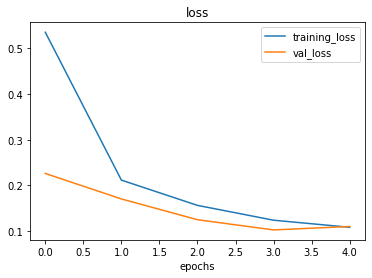

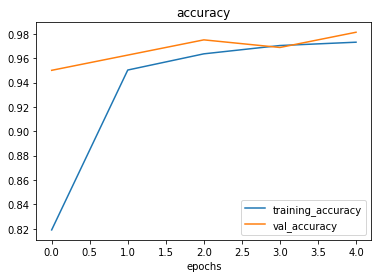

In [23]:
# Checking the model's training curves
plot_loss_curves(history_1)

## Adding data augmentation right into the model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage with horizontal flipping, rotations, zooms, etc
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescale(1./255) # Keep for models like ResNet50V2 but EfficientNet's having resclaing built-in
], name="data_augmentation")

Visualizing the data augmentation layer

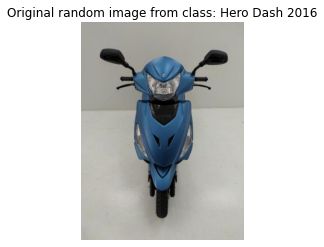

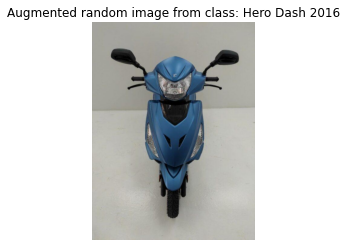

In [14]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names)
target_dir = "images/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read and plot in the random image 
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# plot augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [25]:
# Setup data loaders 
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE) # default = 32

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 2934 files belonging to 4 classes.
Found 735 files belonging to 4 classes.


## Model 2: Feature extraction transfer learning with data augmentation

In [26]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(4, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=int(0.25 * len(test_data)),
                                # Track model training logs
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                       experiment_name="model_2_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/model_2_feature_extraction/20220616-160356
Epoch 1/5
92/92 [==============================] - 102s 1s/step - loss: 0.7392 - accuracy: 0.7267 - val_loss: 0.3715 - val_accuracy: 0.9187
Epoch 2/5
92/92 [==============================] - 84s 901ms/step - loss: 0.4011 - accuracy: 0.8705 - val_loss: 0.2657 - val_accuracy: 0.9250
Epoch 3/5
92/92 [==============================] - 75s 803ms/step - loss: 0.3203 - accuracy: 0.9042 - val_loss: 0.2903 - val_accuracy: 0.9312
Epoch 4/5
92/92 [==============================] - 69s 743ms/step - loss: 0.2743 - accuracy: 0.9127 - val_loss: 0.2259 - val_accuracy: 0.9312
Epoch 5/5
92/92 [==============================] - 65s 703ms/step - loss: 0.2447 - accuracy: 0.9223 - val_loss: 0.1863 - val_accuracy: 0.9563


In [25]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,414
Trainable params: 3,843
Non-trainab

In [27]:
results_model_2 = model_2.evaluate(test_data)

23/23 [==============================] - 8s 338ms/step - loss: 0.1748 - accuracy: 0.9646


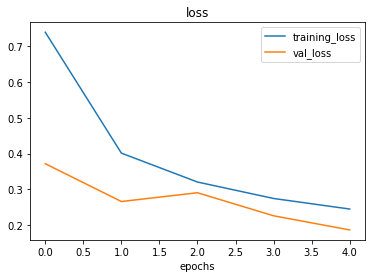

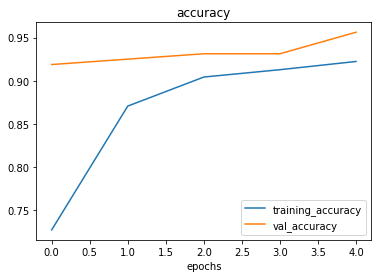

In [28]:
plot_loss_curves(history_2)

## Creating a ModelCheckpoint callback

The ModelCheckpoint callback intermediately saves our model (the full model or just the weights) during training. This is useful so we can come and start where we left off.

In [29]:
# Set checkpoint path
checkpoint_path = "feature_extraction_model_checkpoint_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

## Model 3: Same model as model 2 with ModelCheckpoint callback

In [30]:
# Create model 3 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # if you're using a model such as ResNet50V2, you'll need to rescale your data, efficientnet has rescaling built-in
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs, outputs and middle layers
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # augment our training images (augmentation doesn't occur on test data)
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, this also insures batchnorm layers don't get updated - https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(4, activation="softmax", name="output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)

# Compile
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [32]:
model_3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,414
Trainable params: 3,843
Non-trainab

In [31]:
# Fit the model
history_3 = model_3.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=int(0.25 * len(test_data)),
                                # Track model training logs
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                       experiment_name="model_3_feature_extraction"),
                                          checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_3_feature_extraction/20220616-161201
Epoch 1/5
92/92 [==============================] - ETA: 0s - loss: 0.7564 - accuracy: 0.7130
Epoch 1: saving model to feature_extraction_model_checkpoint_weights\checkpoint.ckpt
92/92 [==============================] - 74s 729ms/step - loss: 0.7564 - accuracy: 0.7130 - val_loss: 0.4122 - val_accuracy: 0.8750
Epoch 2/5
92/92 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8650
Epoch 2: saving model to feature_extraction_model_checkpoint_weights\checkpoint.ckpt
92/92 [==============================] - 65s 708ms/step - loss: 0.4075 - accuracy: 0.8650 - val_loss: 0.3242 - val_accuracy: 0.9250
Epoch 3/5
92/92 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.8974
Epoch 3: saving model to feature_extraction_model_checkpoint_weights\checkpoint.ckpt
92/92 [==============================] - 63s 686ms/step - loss: 0.3267 - accuracy: 0.8974 - val_loss: 0.2400

In [32]:
results_model_3 = model_3.evaluate(test_data)

23/23 [==============================] - 8s 339ms/step - loss: 0.1775 - accuracy: 0.9605


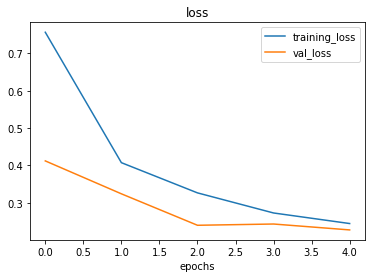

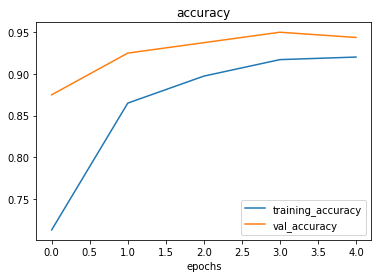

In [33]:
plot_loss_curves(history_3)

## Loading in checkpointed weights

In [34]:
# Load in saved model weights and evaluate model
model_3.load_weights(checkpoint_path)

In [35]:
# Evalaute model_3 with loaded weights
loaded_weights_model_results = model_3.evaluate(test_data)

23/23 [==============================] - 8s 339ms/step - loss: 0.1775 - accuracy: 0.9605


In [36]:
results_model_3

[0.17747566103935242, 0.960544228553772]

In [37]:
loaded_weights_model_results

[0.17747566103935242, 0.960544228553772]

# Model 4: Fine-tuning a previous model

Note: Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data.

In [41]:
# Layers in loaded model
model_3.layers

In [42]:
# Checking if they are trainable
for layer in model_3.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001C57F065F40> True
<keras.engine.sequential.Sequential object at 0x000001C4EC8011C0> True
<keras.engine.functional.Functional object at 0x000001C581F1FA30> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x000001C5816D3580> True
<keras.layers.core.dense.Dense object at 0x000001C581E6BBE0> True


In [43]:
# Checking layers in the base_model (EfficientNetB0) and see if they are trainable
for i, layer in enumerate(model_3.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_6 False
3 tf.math.truediv_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [44]:
# Checking the number of trainable layers in the base model
print(len(model_2.layers[2].trainable_variables))

0


In [38]:
# Setting the last 10 layers of the base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning you typically want to lower the learning rate by 10x*
                metrics=["accuracy"])

In [48]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_3.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_6 False
3 tf.math.truediv_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [49]:
# Checking the number of trainable layers
print(len(model_3.trainable_variables))

12


isntead of using model_4, we use model_3 because we are fine-tuning an already trained model instead of creating a new one

In [39]:
# Fine tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_4 = model_3.fit(train_data,
                        epochs=fine_tune_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_3.epoch[-1], # start training from previous last epoch
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_3_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/model_3_fine_tuning/20220616-161847
Epoch 5/10
92/92 [==============================] - 74s 725ms/step - loss: 0.2026 - accuracy: 0.9329 - val_loss: 0.1970 - val_accuracy: 0.9438
Epoch 6/10
92/92 [==============================] - 63s 673ms/step - loss: 0.1367 - accuracy: 0.9489 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 7/10
92/92 [==============================] - 57s 618ms/step - loss: 0.1247 - accuracy: 0.9560 - val_loss: 0.0781 - val_accuracy: 0.9688
Epoch 8/10
92/92 [==============================] - 58s 629ms/step - loss: 0.0924 - accuracy: 0.9683 - val_loss: 0.1414 - val_accuracy: 0.9750
Epoch 9/10
92/92 [==============================] - 55s 594ms/step - loss: 0.0929 - accuracy: 0.9707 - val_loss: 0.1328 - val_accuracy: 0.9625
Epoch 10/10
92/92 [==============================] - 56s 606ms/step - loss: 0.0788 - accuracy: 0.9727 - val_loss: 0.1086 - val_accuracy: 0.9625


In [40]:
# Evaluate the fine-tuned model (model 4 which is actualy model_3 fine-tuned for another 5 epochs)
results_model_3_fine_tuned = model_3.evaluate(test_data)

23/23 [==============================] - 8s 340ms/step - loss: 0.0810 - accuracy: 0.9728


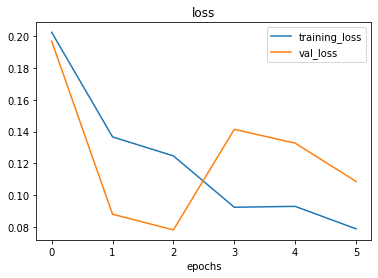

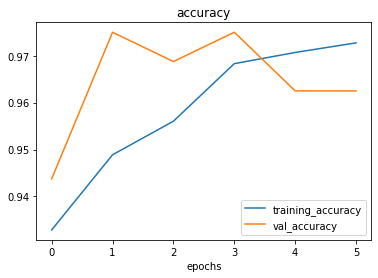

In [41]:
plot_loss_curves(history_4)

The plot_loss_curves function works great with models which have only been fit once, however, we want something to compare one series of running fit() with another (e.g. before and after fine-tuning)

In [42]:
# Function to compare training histories
def compare_history(original_history, new_history, initial_epochs=5):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

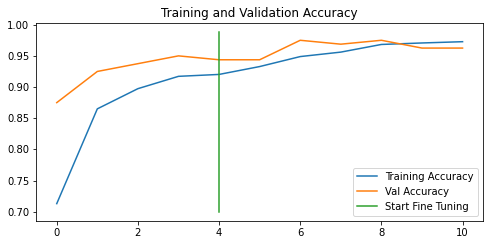

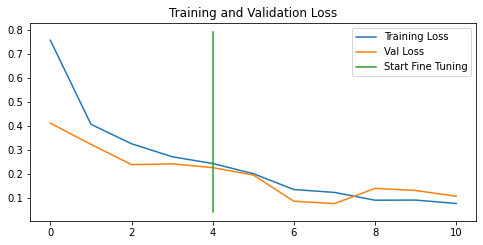

In [43]:
compare_history(history_3, history_4, initial_epochs=5)

## Viewing the experiment data on TensorBoard

In [1]:
# # View tensorboard logs of transfer learning modelling experiments
# # Upload TensorBoard dev records
# %load_ext tensorboard dev upload --logdir ./transfer_learning \
#   --name "Transfer Learning with Fine-Tuning (Price Finder Model) EXP: 01" \
#   --description "A series of different transfer learning experiments with fine-tuning." \
#   --one_shot # exits the uploader once its finished uploading

In [37]:
import tensorflow as tf
%load_ext tensorboard
%tensorboard --logdir=./transfer_learning --port 5000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 5000 (pid 16296), started 0:00:37 ago. (Use '!kill 16296' to kill it.)